### Adding libraries


In [ ]:
import warnings
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
date_from = datetime.date(2013, 1, 1)
date_to = datetime.date(2023, 1, 5)
datafin = ['^BVSP', '^FTSE', '^GSPC', '^J580.JO','^HSI','^NSEI','GLD']
multiData = yf.download(datafin,start= date_from,end=date_to)['Adj Close']
df = multiData.copy()
df

[*********************100%***********************]  7 of 7 completed


,GLD,^BVSP,^FTSE,^GSPC,^HSI,^J580.JO,^NSEI
Date,,,,,,,
2013-01-02,163.169998,62550.0,6027.399902,1462.420044,23311.980469,29696.000000,5993.250000
2013-01-03,161.199997,63312.0,6047.299805,1459.369995,23398.599609,29794.000000,6009.500000
2013-01-04,160.440002,62523.0,6089.799805,1466.469971,23331.089844,29902.000000,6016.149902
2013-01-07,159.429993,61933.0,6064.600098,1461.890015,23329.750000,30068.000000,5988.399902
2013-01-08,160.559998,61128.0,6053.600098,1457.150024,23111.189453,30133.000000,6001.700195
...,...,...,...,...,...,...,...
2022-12-29,168.850006,110031.0,7512.700195,3849.280029,19741.140625,38360.890625,18191.000000
2022-12-30,169.639999,NaN,7451.700195,3839.500000,19781.410156,38338.468750,18105.300781
2023-01-02,NaN,106376.0,NaN,NaN,NaN,NaN,18197.449219


In [ ]:
df=df.dropna()

In [ ]:
TRADING_DAYS = 252
returns_portfolio = np.log(df/df.shift(1))
returns_portfolio.fillna(0, inplace=True)
volatility_portfolio = returns_portfolio.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility_portfolio.tail()

,GLD,^BVSP,^FTSE,^GSPC,^HSI,^J580.JO,^NSEI
Date,,,,,,,
2022-12-23,0.155680,0.222178,0.168748,0.245648,0.324382,0.229420,0.183078
2022-12-28,0.155725,0.220460,0.168711,0.246108,0.324789,0.229192,0.183866
2022-12-29,0.155706,0.220050,0.168712,0.246768,0.324819,0.229375,0.183872
2023-01-03,0.156096,0.225662,0.168780,0.246779,0.325520,0.229486,0.183885
2023-01-04,0.156192,0.224940,0.168663,0.246903,0.327145,0.229390,0.184013


In [ ]:
daily_pct_change = df.pct_change()
daily_pct_change.fillna(0, inplace=True)
cumprod_daily_pct_change = (1 + daily_pct_change).cumprod()
cumprod_daily_pct_change.tail()

,GLD,^BVSP,^FTSE,^GSPC,^HSI,^J580.JO,^NSEI
Date,,,,,,,
2022-12-23,1.025066,1.753765,1.239838,2.629081,0.840472,1.313044,2.971143
2022-12-28,1.029049,1.762382,1.243853,2.586959,0.853592,1.303623,3.023818
2022-12-29,1.034810,1.759089,1.246425,2.632130,0.846824,1.291786,3.035248
2023-01-03,1.048354,1.665324,1.253293,2.614939,0.864160,1.301971,3.042181
2023-01-04,1.058221,1.683997,1.258453,2.634653,0.891950,1.306935,3.010545


Text(0.5, 1.0, 'Indices Cumulative Returns')

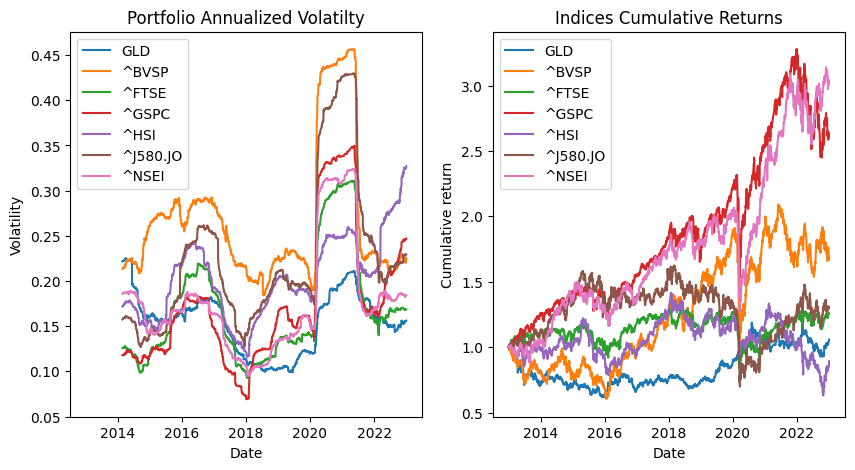

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

sns.lineplot(data=volatility_portfolio, dashes=False, ax=axes[0])
axes[0].set_ylabel('Volatility')
axes[0].set_title('Portfolio Annualized Volatilty')


sns.lineplot(data=cumprod_daily_pct_change, dashes=False, ax=axes[1])
axes[1].set_ylabel('Cumulative return')
axes[1].set_title('Indices Cumulative Returns')



In [ ]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]
df1=pd.DataFrame()
df1['bvsp_rsi_14'] = get_rsi(df['^BVSP'], 14)
df1['ftse_rsi_14'] = get_rsi(df['^FTSE'], 14)
df1['gspc_rsi_14'] = get_rsi(df['^GSPC'], 14)
df1['hsi_rsi_14'] = get_rsi(df['^HSI'], 14)
df1['j580.jo_rsi_14'] = get_rsi(df['^J580.JO'], 14)
df1['nsei_rsi_14'] = get_rsi(df['^NSEI'], 14)
df1['gld_rsi_14'] = get_rsi(df['GLD'], 14)
df1 = df1.dropna()
df1

,bvsp_rsi_14,ftse_rsi_14,gspc_rsi_14,hsi_rsi_14,j580.jo_rsi_14,nsei_rsi_14,gld_rsi_14
Date,,,,,,,
2013-01-08,80.773033,88.303661,34.869283,77.740033,100.000000,88.646082,26.276337
2013-01-09,81.617352,89.961446,47.364164,79.624838,100.000000,77.534925,25.823714
2013-01-10,81.806222,90.055676,66.949205,81.733841,92.339140,76.559634,46.823363
2013-01-11,80.184148,90.728530,66.780581,76.098624,93.223841,70.727195,39.405310
2013-01-14,81.461410,86.435620,63.411716,78.711808,93.792214,78.219738,44.358252
...,...,...,...,...,...,...,...
2022-12-23,53.830317,55.252212,43.989178,60.800243,53.880069,31.694263,56.508923
2022-12-28,55.421076,57.381655,39.706849,63.634871,51.048422,44.231303,58.047596
2022-12-29,54.646132,58.736102,45.800426,61.177318,47.659544,46.524769,60.238402


Text(0.5, 1.0, 'RSI OF EQUITY')

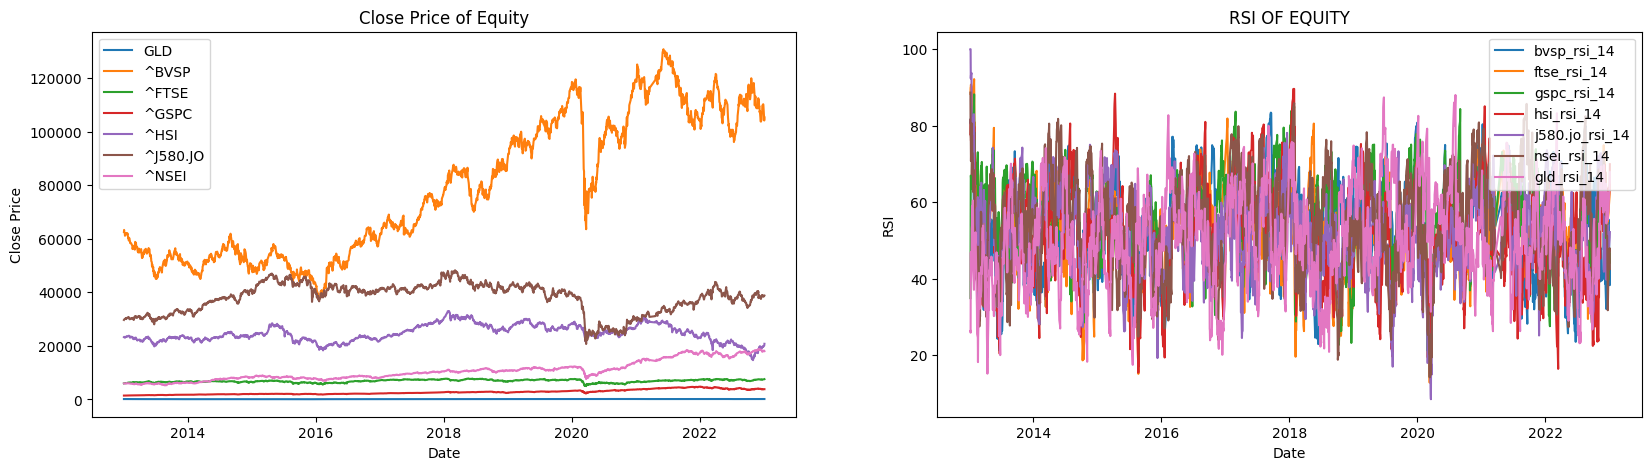

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

sns.lineplot(data=df, dashes=False, ax=axes[0])
axes[0].set_ylabel('Close Price')
axes[0].set_title('Close Price of Equity')


sns.lineplot(data=df1, dashes=False, ax=axes[1])
axes[1].set_ylabel('RSI')
axes[1].set_title('RSI OF EQUITY')

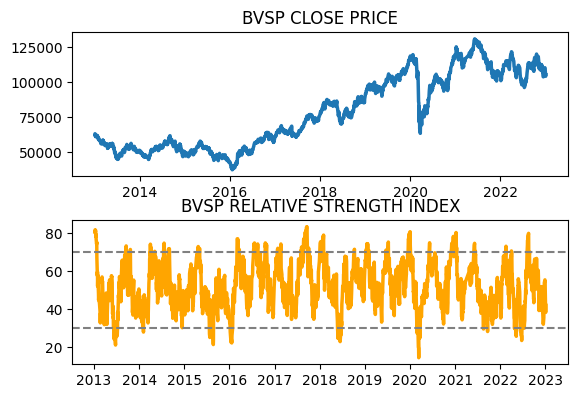

In [ ]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^BVSP'], linewidth = 2.5)
ax1.set_title('BVSP CLOSE PRICE')
ax2.plot(df1['bvsp_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('BVSP RELATIVE STRENGTH INDEX')
plt.show()

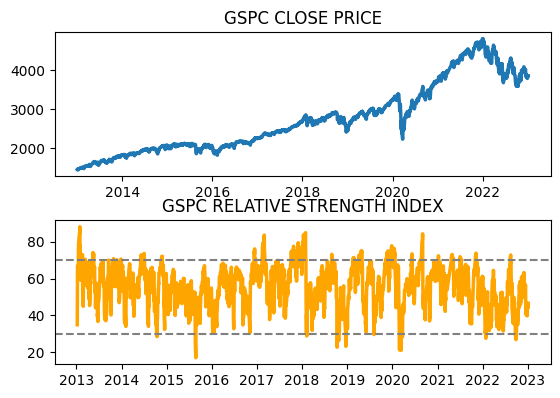

In [ ]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^GSPC'], linewidth = 2.5)
ax1.set_title('GSPC CLOSE PRICE')
ax2.plot(df1['gspc_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('GSPC RELATIVE STRENGTH INDEX')
plt.show()

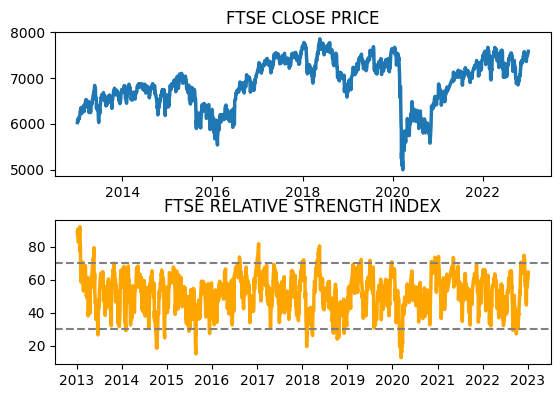

In [ ]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^FTSE'], linewidth = 2.5)
ax1.set_title('FTSE CLOSE PRICE')
ax2.plot(df1['ftse_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('FTSE RELATIVE STRENGTH INDEX')
plt.show()

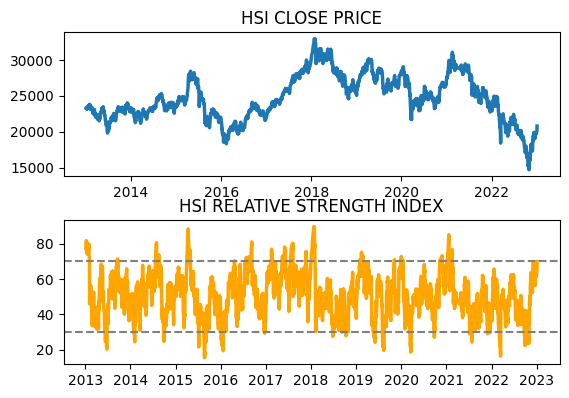

In [ ]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^HSI'], linewidth = 2.5)
ax1.set_title('HSI CLOSE PRICE')
ax2.plot(df1['hsi_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('HSI RELATIVE STRENGTH INDEX')
plt.show()

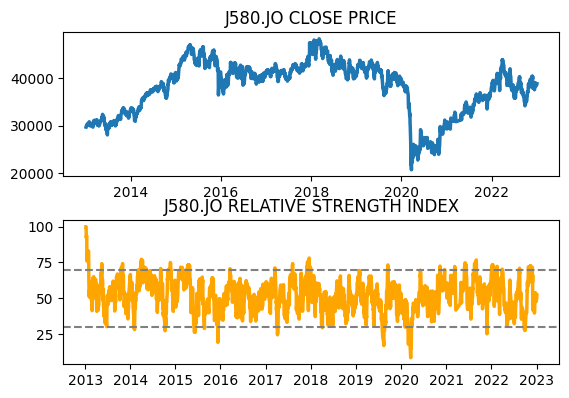

In [ ]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^J580.JO'], linewidth = 2.5)
ax1.set_title('J580.JO CLOSE PRICE')
ax2.plot(df1['j580.jo_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('J580.JO RELATIVE STRENGTH INDEX')
plt.show()

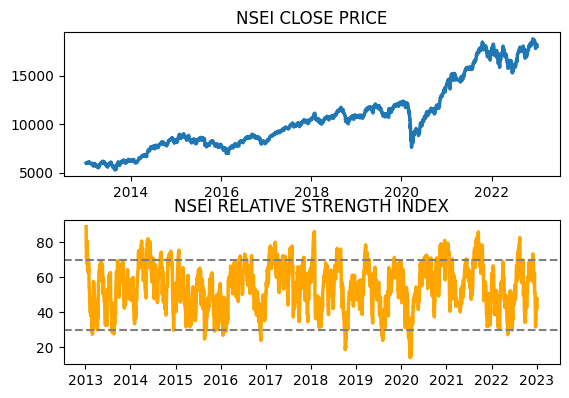

In [ ]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^NSEI'], linewidth = 2.5)
ax1.set_title('NSEI CLOSE PRICE')
ax2.plot(df1['nsei_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('NSEI RELATIVE STRENGTH INDEX')
plt.show()

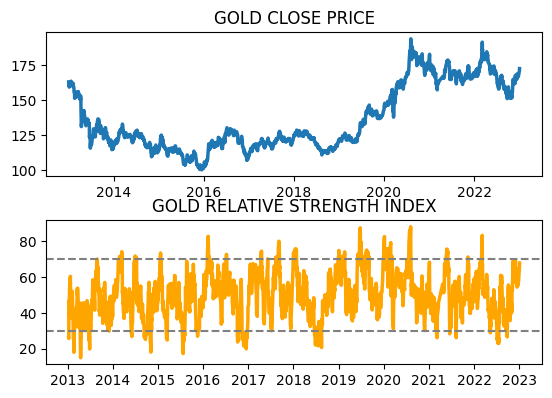

In [ ]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['GLD'], linewidth = 2.5)
ax1.set_title('GOLD CLOSE PRICE')
ax2.plot(df1['gld_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('GOLD RELATIVE STRENGTH INDEX')
plt.show()

In [ ]:
SMA_BVSP_20= df["^BVSP"].rolling(20).mean()
SMA_BVSP_100= df["^BVSP"].rolling(100).mean()
SMA_FTSE_20= df["^FTSE"].rolling(20).mean()
SMA_FTSE_100= df["^FTSE"].rolling(100).mean()
SMA_GSPC_20= df["^GSPC"].rolling(20).mean()
SMA_GSPC_100= df["^GSPC"].rolling(100).mean()
SMA_HSI_20= df["^HSI"].rolling(20).mean()
SMA_HSI_100= df["^HSI"].rolling(100).mean()
SMA_J580JO_20= df["^J580.JO"].rolling(20).mean()
SMA_J580JO_100= df["^J580.JO"].rolling(100).mean()
SMA_NSEI_20= df["^NSEI"].rolling(20).mean()
SMA_NSEI_100= df["^NSEI"].rolling(100).mean()
SMA_GLD_20= df["GLD"].rolling(20).mean()
SMA_GLD_100= df["GLD"].rolling(100).mean()

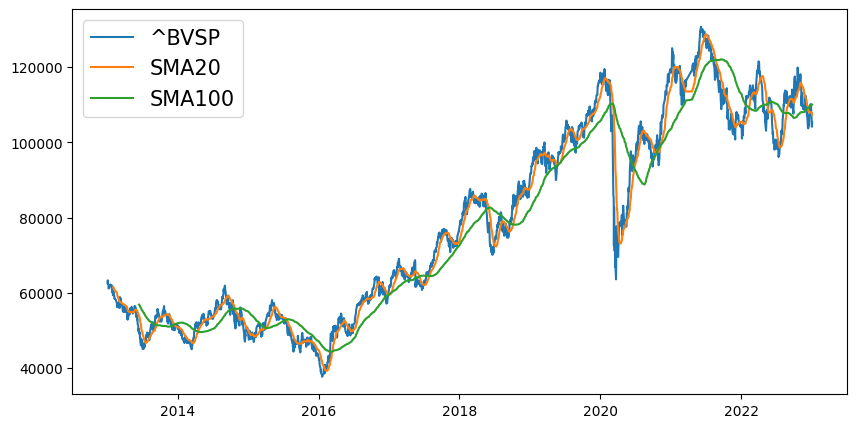

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^BVSP'], label='^BVSP')
plt.plot(SMA_BVSP_20, label='SMA20')
plt.plot(SMA_BVSP_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

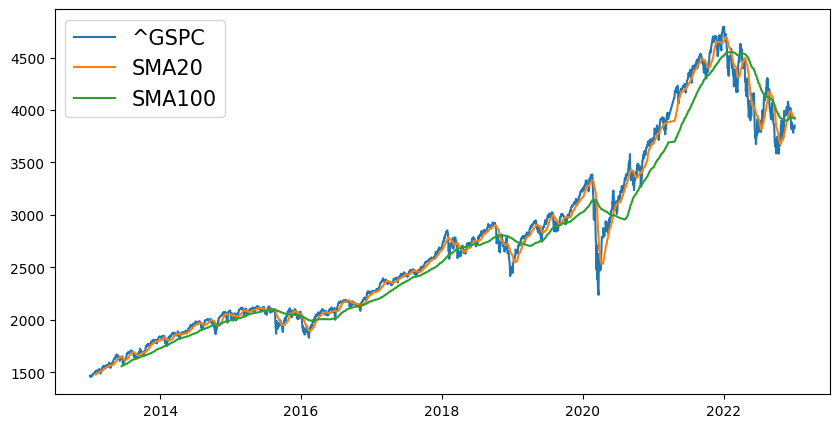

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^GSPC'], label='^GSPC')
plt.plot(SMA_GSPC_20, label='SMA20')
plt.plot(SMA_GSPC_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

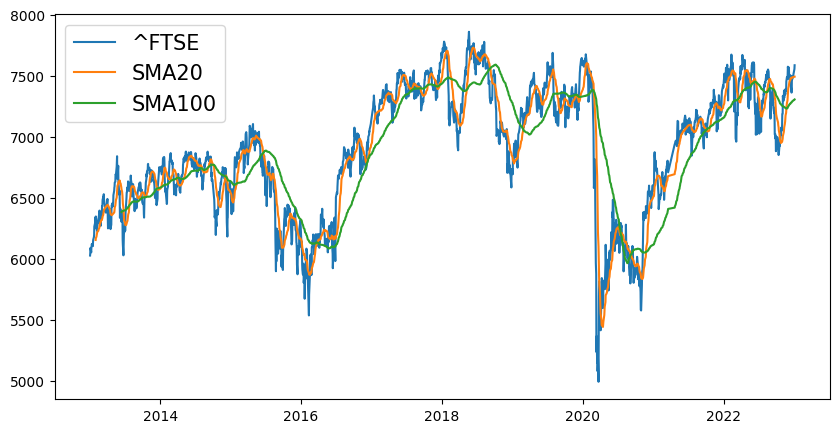

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^FTSE'], label='^FTSE')
plt.plot(SMA_FTSE_20, label='SMA20')
plt.plot(SMA_FTSE_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

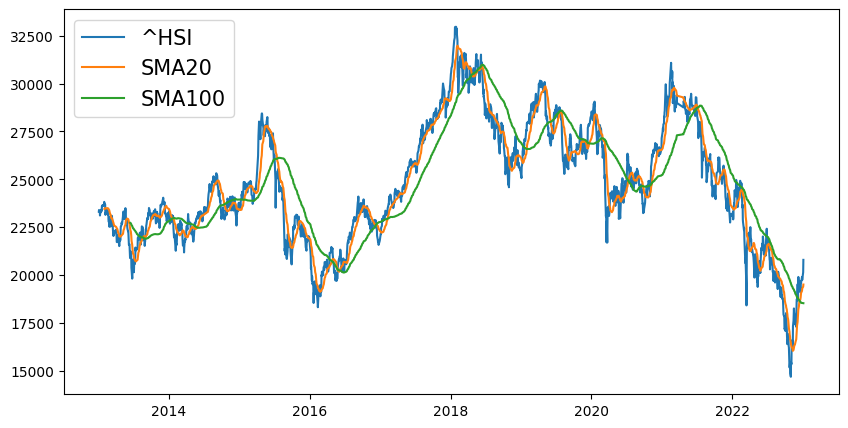

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^HSI'], label='^HSI')
plt.plot(SMA_HSI_20, label='SMA20')
plt.plot(SMA_HSI_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

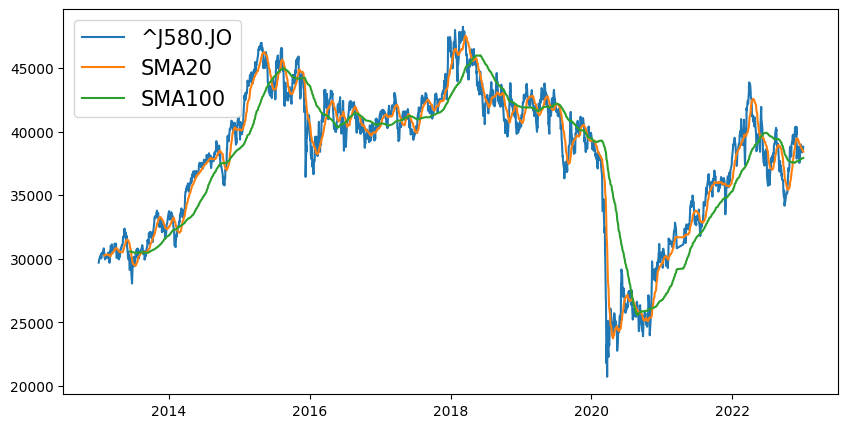

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^J580.JO'], label='^J580.JO')
plt.plot(SMA_J580JO_20, label='SMA20')
plt.plot(SMA_J580JO_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

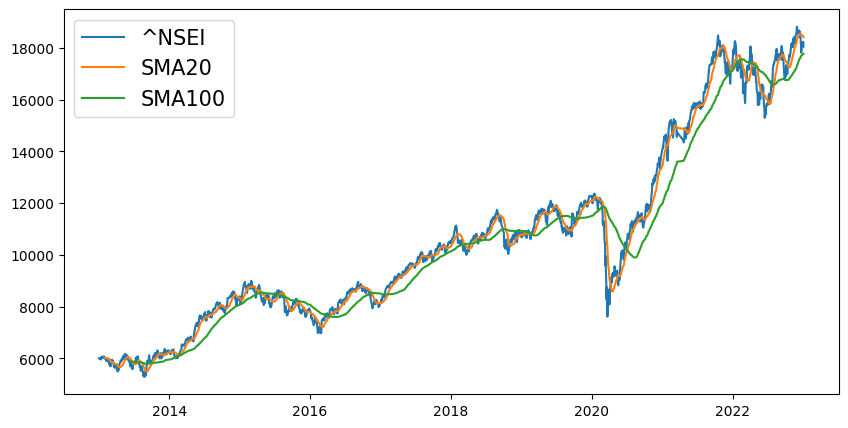

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^NSEI'], label='^NSEI')
plt.plot(SMA_NSEI_20, label='SMA20')
plt.plot(SMA_NSEI_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

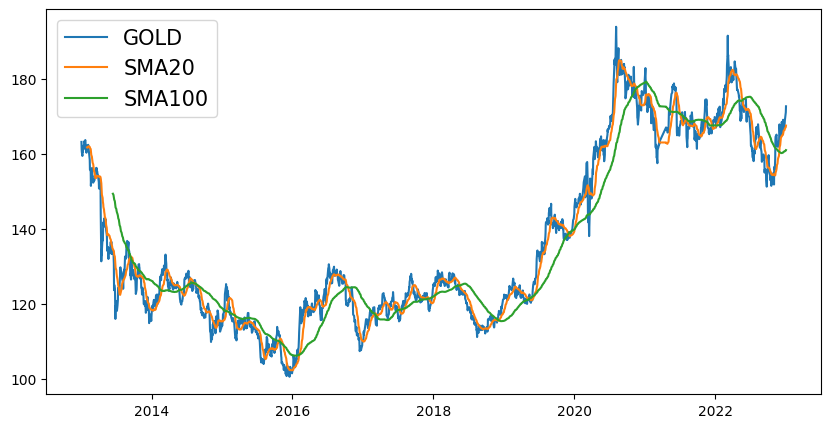

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['GLD'], label='GOLD')
plt.plot(SMA_GLD_20, label='SMA20')
plt.plot(SMA_GLD_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

In [ ]:
EMA_BVSP_20 = df['^BVSP'].ewm(span=20, adjust=False).mean()
EMA_BVSP_100 = df['^BVSP'].ewm(span=100, adjust=False).mean()
EMA_GSPC_20 = df['^GSPC'].ewm(span=20, adjust=False).mean()
EMA_GSPC_100 = df['^GSPC'].ewm(span=100, adjust=False).mean()
EMA_FTSE_20 = df['^FTSE'].ewm(span=20, adjust=False).mean()
EMA_FTSE_100 = df['^FTSE'].ewm(span=100, adjust=False).mean()
EMA_HSI_20 = df['^HSI'].ewm(span=20, adjust=False).mean()
EMA_HSI_100 = df['^HSI'].ewm(span=100, adjust=False).mean()
EMA_J580JO_20 = df['^J580.JO'].ewm(span=20, adjust=False).mean()
EMA_J580JO_100 = df['^J580.JO'].ewm(span=100, adjust=False).mean()
EMA_NSEI_20 = df['^NSEI'].ewm(span=20, adjust=False).mean()
EMA_NSEI_100 = df['^NSEI'].ewm(span=100, adjust=False).mean()
EMA_GLD_20 = df['GLD'].ewm(span=20, adjust=False).mean()
EMA_GLD_100 = df['GLD'].ewm(span=100, adjust=False).mean()

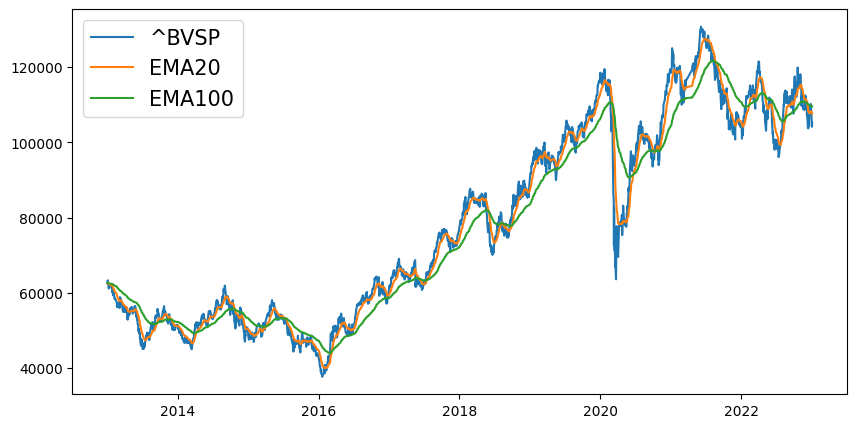

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^BVSP'], label='^BVSP')
plt.plot(EMA_BVSP_20, label='EMA20')
plt.plot(EMA_BVSP_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

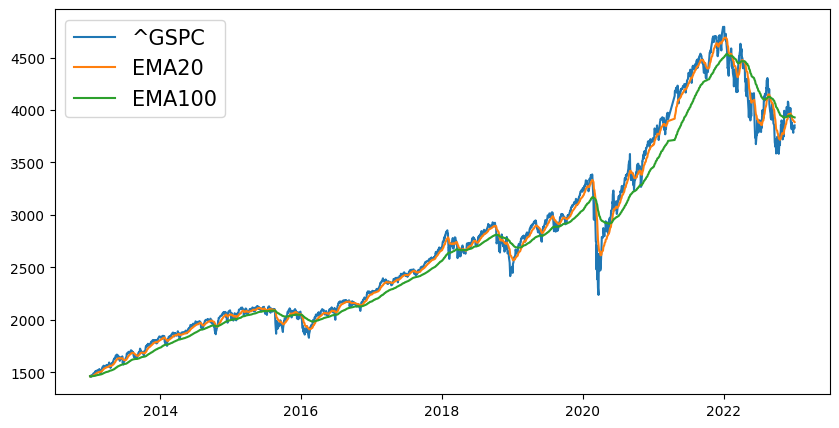

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^GSPC'], label='^GSPC')
plt.plot(EMA_GSPC_20, label='EMA20')
plt.plot(EMA_GSPC_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

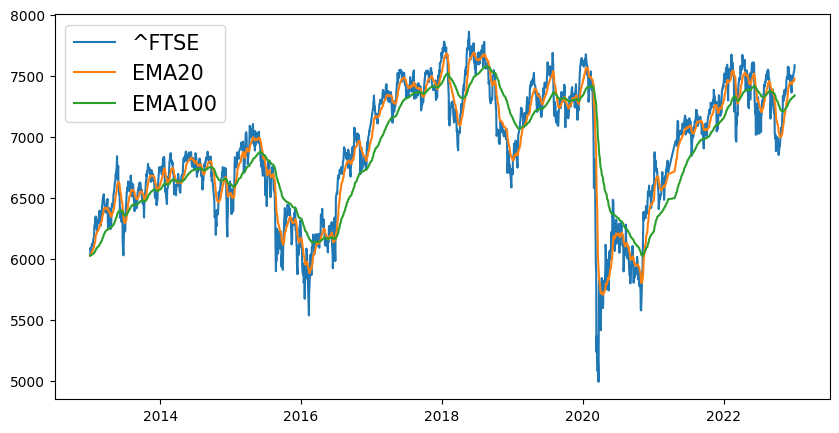

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^FTSE'], label='^FTSE')
plt.plot(EMA_FTSE_20, label='EMA20')
plt.plot(EMA_FTSE_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

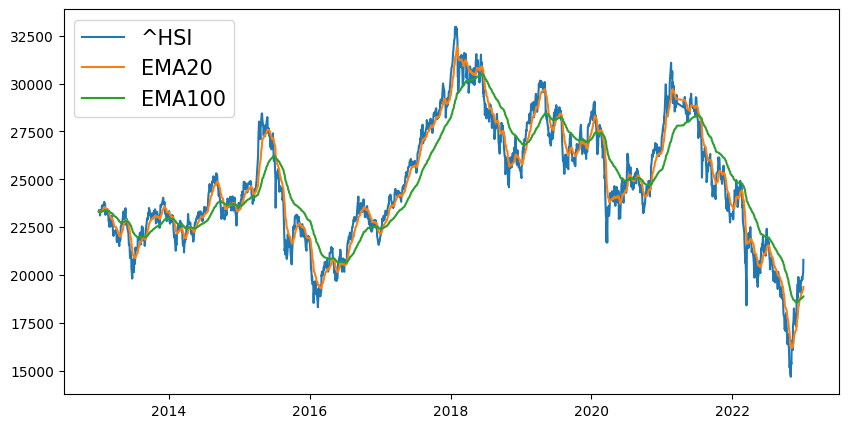

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^HSI'], label='^HSI')
plt.plot(EMA_HSI_20, label='EMA20')
plt.plot(EMA_HSI_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

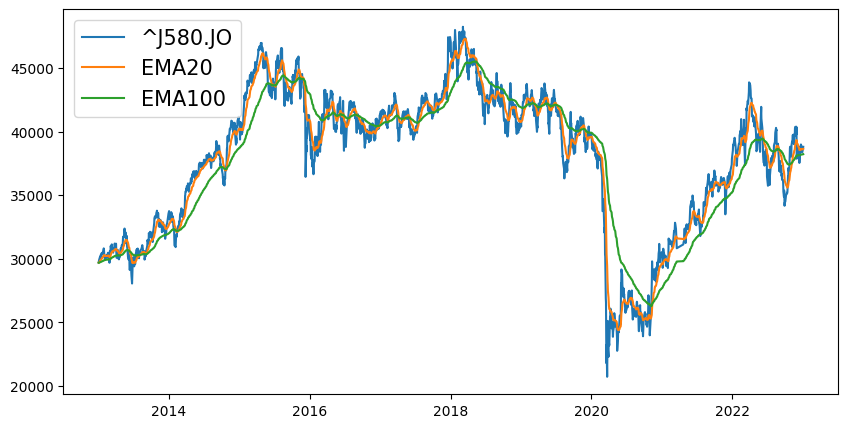

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^J580.JO'], label='^J580.JO')
plt.plot(EMA_J580JO_20, label='EMA20')
plt.plot(EMA_J580JO_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

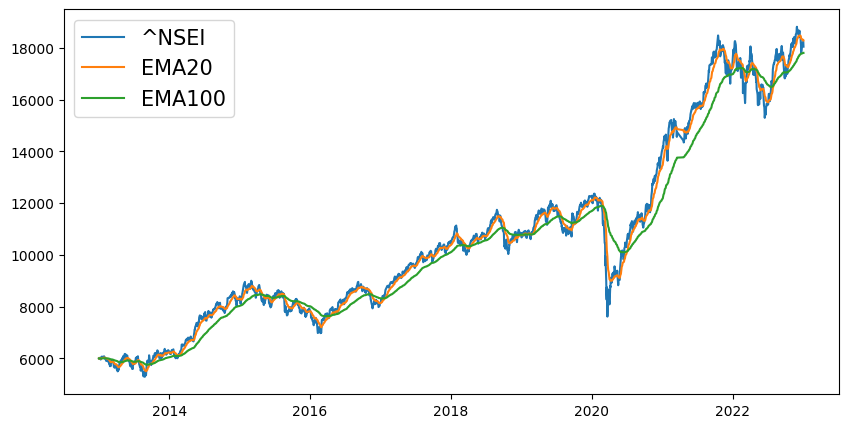

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['^NSEI'], label='^NSEI')
plt.plot(EMA_NSEI_20, label='EMA20')
plt.plot(EMA_NSEI_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

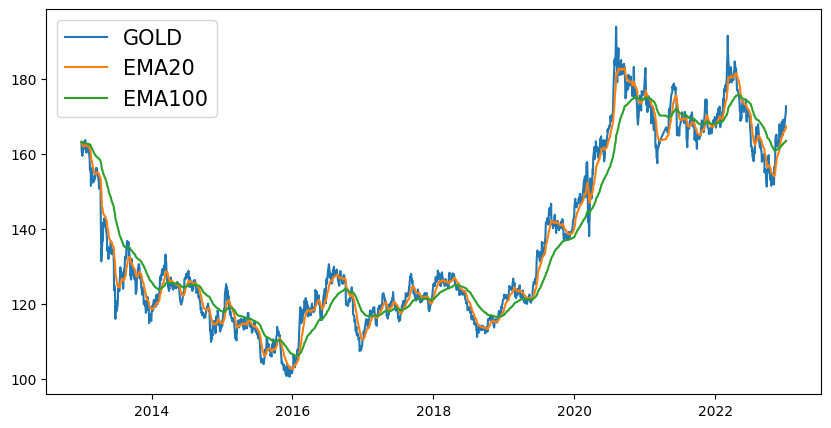

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['GLD'], label='GOLD')
plt.plot(EMA_GLD_20, label='EMA20')
plt.plot(EMA_GLD_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

# BOND DATA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving United Kingdom 10-Year Bond Yield Historical Data.csv to United Kingdom 10-Year Bond Yield Historical Data (3).csv
Saving South Africa 10-Year Bond Yield Historical Data.csv to South Africa 10-Year Bond Yield Historical Data (3).csv
Saving Japan 10-Year Bond Yield Historical Data.csv to Japan 10-Year Bond Yield Historical Data (3).csv
Saving India 10-Year Bond Yield Historical Data.csv to India 10-Year Bond Yield Historical Data (3).csv
Saving China 10-Year Bond Yield Historical Data.csv to China 10-Year Bond Yield Historical Data (3).csv
Saving Brazil 10-Year Bond Yield Historical Data.csv to Brazil 10-Year Bond Yield Historical Data (3).csv
Saving United States 10-Year Bond Yield Historical Data.csv to United States 10-Year Bond Yield Historical Data (3).csv


In [ ]:
df_data_us=pd.read_csv('United States 10-Year Bond Yield Historical Data.csv')
df_data_ind=pd.read_csv('India 10-Year Bond Yield Historical Data.csv')
df_data_chi=pd.read_csv('China 10-Year Bond Yield Historical Data.csv')
df_data_jap=pd.read_csv('Japan 10-Year Bond Yield Historical Data.csv')
df_data_br=pd.read_csv('Brazil 10-Year Bond Yield Historical Data.csv')
df_data_uk=pd.read_csv('United Kingdom 10-Year Bond Yield Historical Data.csv')
df_data_sa=pd.read_csv('South Africa 10-Year Bond Yield Historical Data.csv')

In [ ]:
df_data_us=df_data_us.set_index('Date')
df_data_uk=df_data_uk.set_index('Date')
df_data_ind=df_data_ind.set_index('Date')
df_data_chi=df_data_chi.set_index('Date')
df_data_sa=df_data_sa.set_index('Date')
df_data_jap=df_data_jap.set_index('Date')
df_data_br=df_data_br.set_index('Date')

In [ ]:
df_bond=pd.DataFrame()
df_bond['US_Price']=df_data_us['Price']
df_bond['IN_Price']=df_data_ind['Price']
df_bond['UK_Price']=df_data_uk['Price']
df_bond['SA_Price']=df_data_sa['Price']
df_bond['JA_Price']=df_data_jap['Price']
df_bond['CHI_Price']=df_data_chi['Price']
df_bond['BR_Price']=df_data_br['Price']
df_bond.head()

,US_Price,IN_Price,UK_Price,SA_Price,JA_Price,CHI_Price,BR_Price
Date,,,,,,,
01/05/2023,3.722,7.327,3.552,10.060,0.422,2.870,13.025
01/04/2023,3.690,7.321,3.493,10.010,0.458,2.863,13.275
01/03/2023,3.752,7.321,3.653,10.075,0.418,2.873,13.155
01/02/2023,3.879,7.340,3.699,NaN,NaN,NaN,NaN
12/30/2022,3.879,7.327,3.669,10.185,0.418,2.884,NaN


In [ ]:
df_bond=df_bond.reset_index()
df_bond

,Date,US_Price,IN_Price,UK_Price,SA_Price,JA_Price,CHI_Price,BR_Price
0,01/05/2023,3.722,7.327,3.552,10.060,0.422,2.870,13.025
1,01/04/2023,3.690,7.321,3.493,10.010,0.458,2.863,13.275
2,01/03/2023,3.752,7.321,3.653,10.075,0.418,2.873,13.155
3,01/02/2023,3.879,7.340,3.699,NaN,NaN,NaN,NaN
4,12/30/2022,3.879,7.327,3.669,10.185,0.418,2.884,NaN
...,...,...,...,...,...,...,...,...
2617,01/08/2013,1.864,7.906,2.030,6.365,0.835,3.600,9.310
2618,01/07/2013,1.901,7.900,2.086,6.430,0.834,3.590,9.180
2619,01/04/2013,1.903,7.930,2.117,6.480,0.833,3.610,9.160
2620,01/03/2013,1.911,7.967,2.073,6.435,NaN,NaN,9.110


In [ ]:
df_bond['Date'] = pd.to_datetime(df_bond['Date'], infer_datetime_format=True)
df_bond=df_bond.set_index('Date')
df_bond


,US_Price,IN_Price,UK_Price,SA_Price,JA_Price,CHI_Price,BR_Price
Date,,,,,,,
2023-01-05,3.722,7.327,3.552,10.060,0.422,2.870,13.025
2023-01-04,3.690,7.321,3.493,10.010,0.458,2.863,13.275
2023-01-03,3.752,7.321,3.653,10.075,0.418,2.873,13.155
2023-01-02,3.879,7.340,3.699,NaN,NaN,NaN,NaN
2022-12-30,3.879,7.327,3.669,10.185,0.418,2.884,NaN
...,...,...,...,...,...,...,...
2013-01-08,1.864,7.906,2.030,6.365,0.835,3.600,9.310
2013-01-07,1.901,7.900,2.086,6.430,0.834,3.590,9.180
2013-01-04,1.903,7.930,2.117,6.480,0.833,3.610,9.160


In [ ]:
df_bond=df_bond.dropna()
df_bond.head()

,US_Price,IN_Price,UK_Price,SA_Price,JA_Price,CHI_Price,BR_Price
Date,,,,,,,
2023-01-05,3.722,7.327,3.552,10.060,0.422,2.870,13.025
2023-01-04,3.690,7.321,3.493,10.010,0.458,2.863,13.275
2023-01-03,3.752,7.321,3.653,10.075,0.418,2.873,13.155
2022-12-29,3.820,7.311,3.661,10.255,0.454,2.882,12.760
2022-12-28,3.886,7.314,3.655,10.240,0.455,2.893,12.810


In [ ]:
df_bond_return=np.log(df_bond/df_bond.shift(1))
df_bond_return.fillna(0, inplace=True)
df_bond_return.head()

,US_Price,IN_Price,UK_Price,SA_Price,JA_Price,CHI_Price,BR_Price
Date,,,,,,,
2023-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-04,-0.008635,-0.000819,-0.016750,-0.004983,0.081864,-0.002442,0.019012
2023-01-03,0.016663,0.000000,0.044788,0.006473,-0.091388,0.003487,-0.009081
2022-12-29,0.017961,-0.001367,0.002188,0.017708,0.082616,0.003128,-0.030487
2022-12-28,0.017130,0.000410,-0.001640,-0.001464,0.002200,0.003810,0.003911


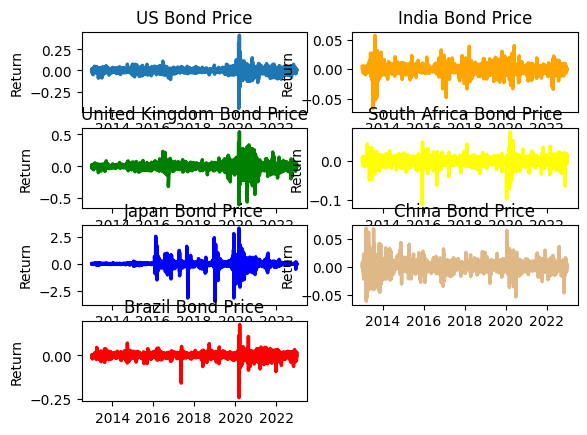

In [ ]:
ax1 = plt.subplot(4,2,1)
ax2 = plt.subplot(4,2,2)
ax3 = plt.subplot(4,2,3)
ax4 = plt.subplot(4,2,4)
ax5 = plt.subplot(4,2,5)
ax6 = plt.subplot(4,2,6)
ax7 = plt.subplot(4,2,7)

ax1.plot(df_bond_return['US_Price'], linewidth = 2.5)
ax1.set_ylabel('Return')
ax1.set_title('US Bond Price')

ax2.plot(df_bond_return['IN_Price'], color = 'orange', linewidth = 2.5)
ax2.set_ylabel('Return')
ax2.set_title('India Bond Price')

ax3.plot(df_bond_return['UK_Price'], color = 'green', linewidth = 2.5)
ax3.set_ylabel('Return')
ax3.set_title('United Kingdom Bond Price')

ax4.plot(df_bond_return['SA_Price'], color = 'yellow', linewidth = 2.5)
ax4.set_ylabel('Return')
ax4.set_title('South Africa Bond Price')

ax5.plot(df_bond_return['JA_Price'], color = '#0000FF', linewidth = 2.5)
ax5.set_ylabel('Return')
ax5.set_title('Japan Bond Price')

ax6.plot(df_bond_return['CHI_Price'], color = '#DEB887', linewidth = 2.5)
ax6.set_ylabel('Return')
ax6.set_title('China Bond Price')

ax7.plot(df_bond_return['BR_Price'], color = 'red', linewidth = 2.5)
ax7.set_ylabel('Return')
ax7.set_title('Brazil Bond Price')
plt.show()

### Solution portfolio Analysis

Case 1: 90Equity + 10 bond

Case 2: 80Equity + 20 Bond

Case 3: 70 Equity + 30 Bond

Case 4: 60 Equity + 40 Bond

Case 5: 10 Equity + 90 Bond

Baseline : 100 Equity

### Portfolio - different sectors


In [ ]:
### code here

### Strategic Asset Allocation